In [0]:
import pandas as pd
import numpy as np

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
import os
path = os.path.join("gdrive/My Drive/", "ampg.csv")
df = pd.read_csv(path)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
print("Presence of null values:" + str(df.isnull().values.any()))

Presence of null values:False


In [59]:
car_names = df['car name'].tolist()
df['type'] = [1 if 'diesel' in element else 0 for element in car_names]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,type
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [60]:
df.pop('car name')
print(df ['type'].value_counts())

0    391
1      7
Name: type, dtype: int64


In [61]:
print ("Presence of any null values:" + str(df.isnull().values.any()))

Presence of any null values:False


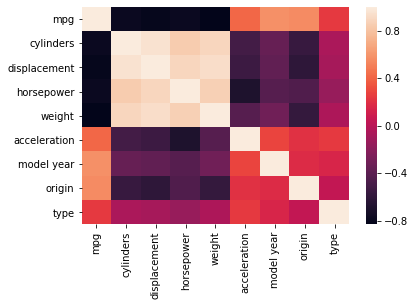

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)
plt.show()

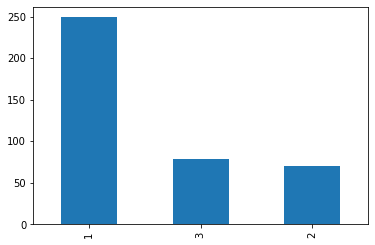

In [63]:
pd.value_counts(df['origin']).plot.bar()

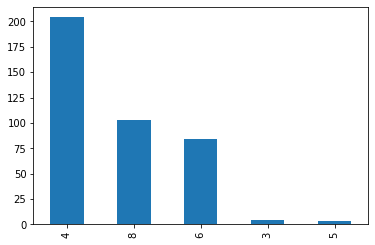

In [64]:
pd.value_counts(df['cylinders']).plot.bar()

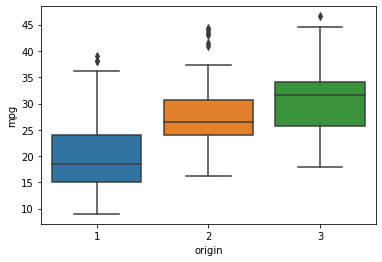

In [65]:
sns.boxplot(x = 'origin', y = 'mpg', data = df)

In [66]:
american_cars = df[df['origin'] == 1]
japanese_cars = df[df['origin'] == 3]
european_cars = df[df['origin'] == 2]
quantile_usa = american_cars['mpg'].quantile(0.90)
quantile_jp = japanese_cars['mpg'].quantile(0.90)
quantile_eu = european_cars['mpg'].quantile(0.90)
american_cars[american_cars['mpg'] < quantile_usa]
european_cars[european_cars['mpg'] < quantile_eu]
japanese_cars[japanese_cars['mpg'] < quantile_jp]
frames = [american_cars, european_cars, japanese_cars]
df = pd.concat(frames)
print(len(df.index))

398


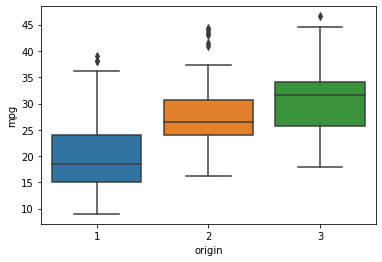

In [67]:
sns.boxplot(x = 'origin', y = 'mpg', data = df)

In [0]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [71]:
from sklearn.model_selection import train_test_split
training,test = train_test_split(df, train_size = 0.7, test_size = 0.3,shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3,shuffle=True)
training_label = training.pop('mpg')
test_label = test.pop('mpg')
valid_label = valid.pop('mpg')
training_label.head()
training.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,type
157,8,350.0,145,4440,14.0,75,1,0
235,4,97.0,75,2265,18.2,77,3,0
207,4,130.0,102,3150,15.7,76,2,0
349,4,91.0,68,1985,16.0,81,3,0
40,8,351.0,153,4154,13.5,71,1,0


In [72]:
# instantiate training models
xgb = XGBRegressor()
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=3)
# train the models
xgb.fit(training, training_label)
dtc.fit(training, training_label)
rfc.fit(training, training_label)
knn.fit(training, training_label)

[10:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [73]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [0]:
xgb_predict = xgb.predict(test)
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
knn_predict = knn.predict(test)

In [75]:
from sklearn.metrics import mean_squared_error
import math
accuracy = dict()
accuracy['XGBoost'] = math.sqrt(mean_squared_error(test_label, xgb_predict))
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(test_label,knn_predict))
print(accuracy)

{'XGBoost': 2.838165324047122, 'DecisionTree': 3.8009428654830724, 'RandomForest': 2.882786367677401, 'KNN': 4.449837699911712}


In [76]:
# perform validation testing for dataset
xgb_predict = xgb.predict(valid)
dtc_predict = dtc.predict(valid)
rfc_predict = rfc.predict(valid)
knn_predict = knn.predict(valid)
# judge accuracy using built-in function
accuracy['XGBoost'] = math.sqrt(mean_squared_error(valid_label, xgb_predict))
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(valid_label,knn_predict))
print(accuracy)

{'XGBoost': 2.8590095384515704, 'DecisionTree': 3.962427707016664, 'RandomForest': 3.0068268118051753, 'KNN': 4.331612906339897}


In [77]:
results = pd.DataFrame({'label mpg': valid_label,'prediction': xgb.predict(valid)})
results.head()

,label mpg,prediction
62,13.0,14.045192
192,22.0,18.484566
380,36.0,35.488049
190,14.5,14.454473
27,11.0,12.825788


,Algorithms,Percentage
0,XGBoost,2.859010
1,DecisionTree,3.962428
2,RandomForest,3.006827
3,KNN,4.331613


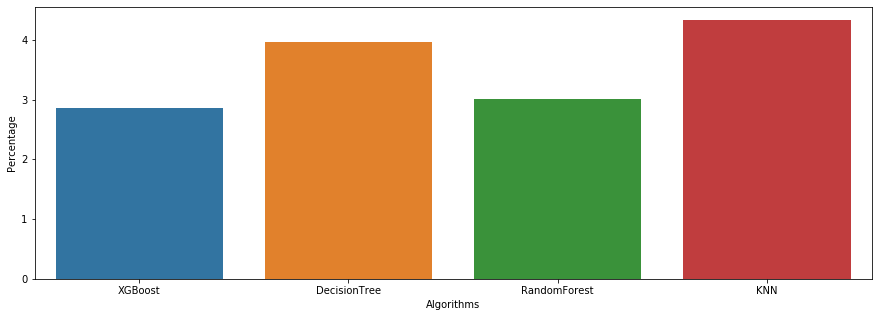

In [78]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1);

In [80]:
max_accuracy = min(accuracy,key=accuracy.get)
max_accuracy

'XGBoost'